In [20]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg

%matplotlib inline

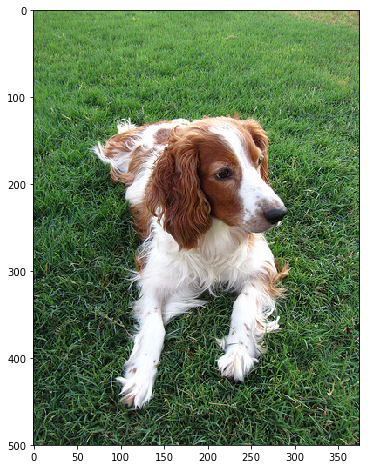

In [21]:
img = mpimg.imread("./test_images/ILSVRC2012_val_00018556.JPEG")
plt.figure(figsize=(8,8))
plt.imshow(img)

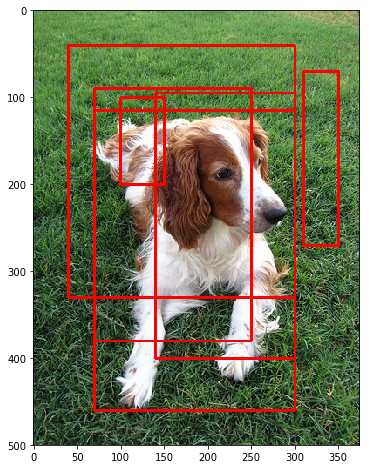

In [22]:
img_copy = img.copy()
bboxes = [[70,300,115,460], [70,250,90,380], [140,300,95,400], [100,150,100,200], [40,300,40,330],[310,350,70,270]]
confidences = [0.95, 0.7, 0.8, 0.6, 0.8, 0.3]

for bbox in bboxes:
    x1, x2, y1, y2 = bbox
    cv2.rectangle(img_copy, (x1, y1), (x2, y2), 0xFF3333, thickness=2)
    
plt.figure(figsize=(8,8))
plt.imshow(img_copy)

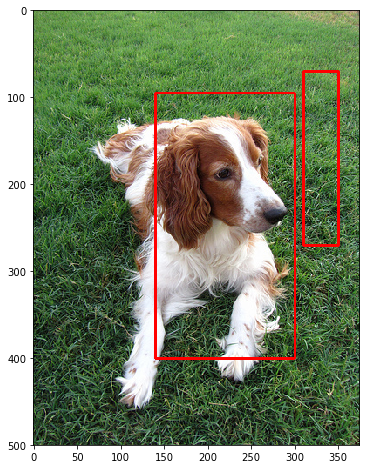

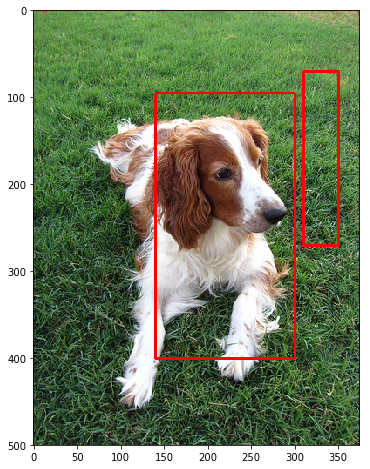

In [23]:
## TASK 1 ##
# FINDING THE INTERSECTION #
def get_overlap(boxA, boxB):
    A_x1, A_x2, A_y1, A_y2 = boxA
    B_x1, B_x2, B_y1, B_y2 = boxB
    
    ## TO BE COMPLETED
    ## overlap is a bounding box of form [x1, x2, y1, y2]
    
    x1 = max(A_x1, B_x1)
    y1 = max(A_y1, B_y1)
    x2 = min(A_x2, B_x2)
    y2 = min(A_y2, B_y2)
    
    ## IF THERE IS NO OVERLAP YOU SHOULD RETURN [0,0,0,0]
    if x1 >= x2 or y1 >= y2:
        overlap = [0,0,0,0]
    else:
        overlap = [x1,x2,y1,y2]
        
    return overlap

# sample randomle from bboxes
i, j = random.sample(range(6),2)
x1,x2,y1,y2 = get_overlap(bboxes[i], bboxes[j])

# plot the two bboxes
img_copy = img.copy()
cv2.rectangle(img_copy, (bboxes[i][0], bboxes[i][2]), (bboxes[i][1], bboxes[i][3]), 0xFF3333, thickness=2)
cv2.rectangle(img_copy, (bboxes[j][0], bboxes[j][2]), (bboxes[j][1], bboxes[j][3]), 0xFF3333, thickness=2)
plt.figure(figsize=(8,8))
plt.imshow(img_copy)

# fill in the intersection
cv2.rectangle(img_copy, (x1, y1), (x2, y2), 0x33FF33, thickness=-1)
plt.figure(figsize=(8,8))
plt.imshow(img_copy)

0.0


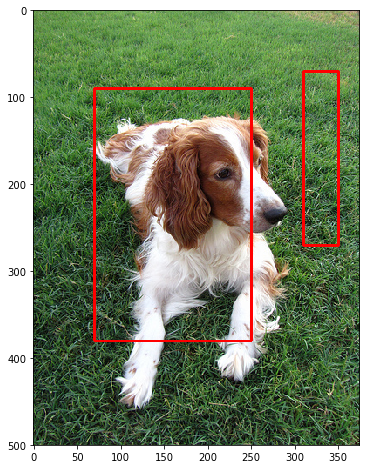

In [24]:
## TASK 2 ##
# FIND INTERSECTION OVER UNION - IOU #
def get_iou(boxA, boxB):
    overlap = get_overlap(boxA, boxB)
    
    A_x1, A_x2, A_y1, A_y2 = boxA
    B_x1, B_x2, B_y1, B_y2 = boxB
    O_x1, O_x2, O_y1, O_y2 = overlap
    
    ## FILL IN CALCULATION FOR IOU HERE ##
    boxA_area = (A_x2 - A_x1) * (A_y2 - A_y1)
    boxB_area = (B_x2 - B_x1) * (B_y2 - B_y1)
    overlap_area = (O_x2 - O_x1) * (O_y2 - O_y1)
    
    union_area = boxA_area + boxB_area - overlap_area
    iou = overlap_area / union_area
    
    return iou

# sample randomle from bboxes
i, j = random.sample(range(6),2)

# plot the two bboxes
img_copy = img.copy()
cv2.rectangle(img_copy, (bboxes[i][0], bboxes[i][2]), (bboxes[i][1], bboxes[i][3]), 0xFF3333, thickness=2)
cv2.rectangle(img_copy, (bboxes[j][0], bboxes[j][2]), (bboxes[j][1], bboxes[j][3]), 0xFF3333, thickness=2)
plt.figure(figsize=(8,8))
plt.imshow(img_copy)

print(get_iou(bboxes[i], bboxes[j]))

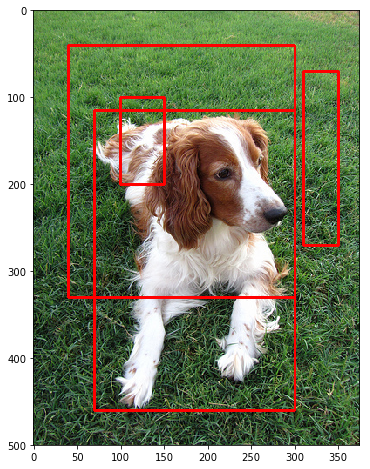

In [32]:
## TASK 3 ##
# NON MAX SUPRESSION #
def nms(bboxes, confidences, threshold):
    
    idxs = np.argsort(confidences)
    idxs = idxs[::-1]
    suppress = set()

    for i, idx_high_conf in enumerate(idxs):
        if idx_high_conf in suppress:
            continue
        for idx_low_conf in idxs[i+1:]:
            if idx_low_conf in suppress:
                continue
            
            iou = get_iou(bboxes[idx_high_conf], bboxes[idx_low_conf])
            if (iou > threshold):
                suppress.add(idx_low_conf)
    
    # Takes the set different between all indexes and suprressed indexes
    pick = set(range(len(bboxes))) - suppress
    
    return list(pick)

picks = nms(bboxes, confidences, 0.5)
img_copy = img.copy()
for pick in picks:
    bbox = bboxes[pick]
    cv2.rectangle(img_copy, (bbox[0], bbox[2]), (bbox[1], bbox[3]), 0xFF3333, thickness=2)
plt.figure(figsize=(8,8))
plt.imshow(img_copy)
    

In [106]:
np.argsort(confidences)[:3]

array([5, 3, 1])

In [101]:
pick = set(np.argsort(confidences))

In [102]:
pick

{0, 1, 2, 3, 4, 5}

In [107]:
set(range(5))

{0, 1, 2, 3, 4}

In [17]:
A = [1,2,3,4,5]
A[0:]

[1, 2, 3, 4, 5]

In [35]:
A = [1,2,3,4,5,10,20,30,40,50]
B = set([1,5,6,20])
for i in A if i not in B:
    print(i)

SyntaxError: invalid syntax (<ipython-input-35-7ac589cc631e>, line 3)